## House prices prediction in the city of Milano, Italy

## 1. Introduction to the project and sources

This project explores the application of linear regression to predict house prices in the Italian city of Milan based on various features commonly used in real estate analysis. The Linear Regression Model comprises essential property attributes such as the number of rooms, square meters, bathrooms, price, and neighborhood, offering a comprehensive view of the factors influencing property values.

To ensure the robustness and accuracy of the model, extensive data cleaning and preprocessing steps were carried out. These steps include inspecting and refining key columns, adding a derived feature called "price per square meter," and removing outliers using both business logic and statistical methods. Additionally, categorical data like "neighborhood" was transformed into dummy variables using one-hot encoding.

After successfully cleaning all the required variables, the second part of the project focuses on building the linear regression model.

Finally, the model is tested with a function that allows users to input self-defined values (e.g., "neighborhood" and "number of rooms") and receive the predicted price as output.

This project provides a structured approach to handling messy datasets and highlights how data science can support the real estate industry.

**Sources**

1) The dataset used in this project was extracted by Tommaso Ramella through web scraping from a popular Italian real estate website. His dataset provides valuable insights into the housing market in Milan and has been shared on Kaggle for use by other data enthusiasts. The dataset can be accessed here: https://www.kaggle.com/datasets/tommasoramella/milano-housing-price

2) This project is based on the techniques and code from the YouTube tutorial:
"Machine Learning & Data Science Project" by "Codebasics" (https://www.youtube.com/@codebasics)
I created a case study and adapted the code using a different dataset.

## 2. Case Study

A real estate agency operating in Milan wants to optimize its pricing strategies. They aim to provide accurate price estimates to their clients (both sellers and buyers) and remain competitive in the market. They hired me as a data scientist to build a model that predicts house prices based on property features. This model will also help their agents provide data-driven recommendations to clients during negotiations.

## 3. Introduction to the Data

The following data dictionary provides detailed information about the variables in the dataset, including their names, types, and descriptions. The original dataset contains many columns. For better readability, the following dictionary highlights the most relevant features for the project:

<table style="text-align: left; margin-left: 0;">
  <tr>
    <th>Column Name</th>
    <th>Data Type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>index</td>
    <td>int</td>
    <td>Unique ID for each record</td>
  </tr>
  <tr>
    <td>rooms</td>
    <td>int</td>
    <td>Number of rooms</td>
  </tr>
  <tr>
    <td>m2</td>
    <td>float</td>
    <td>Area in square meters</td>
  </tr>
  <tr>
    <td>bathrooms</td>
    <td>string</td>
    <td>Number of bathrooms</td>
  </tr>
  <tr>
    <td>price</td>
    <td>float</td>
    <td>Price of the property in euros</td>
  </tr>
  <tr>
    <td>neighborhood</td>
    <td>string</td>
    <td>Neighborhood or area of the property</td>
  </tr>
</table>


## 4. Import of the necessary libraries for the project
The following cell shows all the libraries used for this project:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score

## 5. Importing the data 

Let's take a look at the dataset. As explained in Chapter 3, 'Introduction to the Data', the dataset has many more columns than the ones displayed in the data dictionary:

In [2]:
df = pd.read_excel("milano_housing_02_2_23.xlsx")
df.head(2)

,index,rooms,m2,bathrooms,floor,condominium_expenses,date,contract,typology,total_floors,...,energy_certification,co2_emissions,elevator,floor_level,heating_centralized,heating_radiator,heating_gas,air_conditiong_centralized,air_conditioning_heat,renewable_energy_performance_index_KWh/m2
0,0,3,140.0,2,4,535,08/02/2023,sale,apartment | entire property | stately property...,6 floors,...,NaN,NaN,1,4,centralized,to radiators,methane powered,autonomous,cold/hot,NaN
1,0,4,121.0,2,3,200,17/02/2023,sale,apartment | entire property | stately property...,7 floors,...,NaN,NaN,1,3,autonomous,to radiators,gas powered,system preparation,NaN,NaN


For this project, the unnecessary columns will be dropped from the DataFrame in  the next step of the data cleaning process.

## 6. Data Cleaning

Chapter 6 presents the complete data cleaning process, including the removal of irrelevant columns and the inspection of the remaining ones. Each column has a dedicated subchapter that discusses its specific challenges and the applied data cleaning methods.

Additionally, subchapter 6.6. introduces the creation of a new feature by combining existing ones — an approach known as feature engineering.

### 6.1. Dropping irrelevant columns 


In the next line of code, I'll keep only the features required for the project.
First, I create a new DataFrame df1, which is an identical copy of the previous DataFrame (df); then, I apply the first "data cleaning" step change on this new DataFrame (i.d. keeping only the necessary columns).

Throughout the entire project, I will follow this best practice to ensure version control for each change. This approach will ensure:

1) A structured code;
2) That the original data remains unchanged;
4) That the changes are clearly trackable.

In [3]:
df1 = df.copy()
df1 = df1[['rooms', 'm2', 'bathrooms', 'price', 'neighborhood']]

# alternative code: df1= df[['rooms', 'm2', 'bathrooms', 'price', 'neighborhood']].copy()
#df1.head(3)
df1.shape

(2130, 5)

### 6.2. Deleting NaN values from the dataframe

The next step involves deleting all the empty cells (NaN values) from each column in the dataframe:

In [4]:
df2 = df1.dropna()    
#df2.isnull().sum()
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 0 to 2129
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rooms         1979 non-null   object 
 1   m2            1979 non-null   float64
 2   bathrooms     1979 non-null   object 
 3   price         1979 non-null   float64
 4   neighborhood  1979 non-null   object 
dtypes: float64(2), object(3)
memory usage: 92.8+ KB


(1979, 5)

### 6.3. "rooms" column

In this part I focused on cleaning the column "rooms". This column shows the number of rooms in the property. Let's have a first look at the column:

In [5]:
df2.rooms.unique()

array(['3', '4', '2', '5', '1', '5+', '110m²'], dtype=object)

One value refers to the size of the house rather than the number of rooms (110 m²), and another value contains '5+', which is too imprecise since there is no upper limit. Additionally, the datatype is string instead of integer. To clean this column, I will apply the following changes:

1) Remove the values mentioned above;
2) Convert the 'rooms' column from string to integer.

In [6]:
# Create a new dataframe df3 to preserve the original dataframe
df3 = df2.copy()

# Drop rows where 'rooms' contains "m²" or "5+" values
df3 = df3[~df3['rooms'].astype(str).str.contains(r'm²|5\+', na=False)]
df4 = df3.copy()
df4['rooms'] = df4['rooms'].astype(int).copy()

Now let's take a look at the unique values after the changes:

In [7]:
df4.rooms.unique()

array([3, 4, 2, 5, 1])

The undesired values no longer appear, and the values are now integers instead of strings (they are no longer enclosed in quotation marks). The 'rooms' column is now fully cleaned, and we can proceed with the next column.

### 6.4. "m2" (square meters) column

Let's check the data type of the 'm2' column:

In [8]:
print(df4['m2'].dtype)

float64


I want to convert this column's data type to integer:

In [9]:
df5 = df4.copy()
df5['m2'] = df5['m2'].astype(int)

Now, I want to view the unique values in this column to check for any unusual values, like previously done for the column "rooms":

In [10]:
df5["m2"].unique()

array([    140,     121,      55,      60,     220,     136,     150,
            73,     120,     100,     133,     145,     105,     110,
           122,     183,     175,     130,     273,      40,      87,
           170,     160,     125,     180,      95,      70,      45,
           250,      75,     240,      50,      61,     185,     115,
            90,     174,      93,     103,      80,     109,     195,
           173,     104,     158,     124,      58,     161,     200,
            89,      66,     157,     190,      25,      91,     102,
           181,      49,      85,     152,     114,     165,      18,
            81,     141,      14,     226,     212,     135,      97,
            98,     242,      47,      68,     162,     235,     131,
            77,      48,     224,     205,     126,      71,     151,
            64,     350,      67,     188,     326,      65,      74,
            79,      78,     127,      69,      53,      84,      96,
            36,     

The value "1250000'is unusually big, especially given that the other values are much smaller.

In [11]:
df5.groupby("m2")["m2"].agg("count")

m2
14         2
18         1
25         4
27         3
28         2
          ..
359        1
360        1
371        1
428        1
1250000    1
Name: m2, Length: 224, dtype: int64

Since it stands out as potential outliers or mistake in the dataset, dropping it is a reasonable decision:

In [12]:
df5 = df5[~df5['m2'].isin([1250000])]

### 6.5. "bathrooms" column

Now, I want to view the unique values of the "bathrooms" feature to get an initial overview of the numbers present in this column:

In [13]:
df5["bathrooms"].unique()

array(['2', '1', '3', '3+', '4', '6', 'S'], dtype=object)

As seen in the previous output, the data type is 'string'. Moreover, there are unclean values like "3+" and "S". Let's proceed with solving the two issues:

In [14]:
df6 = df5.copy()

In [15]:
df6 = df6[~df6['bathrooms'].isin(['3+', 'S'])]

df6['bathrooms'] = df6['bathrooms'].astype(int)

In [16]:
df6["bathrooms"].unique()

array([2, 1, 3, 4, 6])

### 6.6. "price" column

Let's take a look at the data type of the column "price":

In [17]:
print(df6['price'].dtype)

float64


In [18]:
df6["price"].unique()

array([ 880000.,  649000.,  300000.,  250000., 2250000.,  920000.,
        950000.,  445000.,  670000.,  333000.,  660000.,  940000.,
        449000.,  858000.,  465000., 1310000., 1300000.,  595000.,
        795000.,  420000., 1420000., 1650000.,  189000.,  355000.,
        620000.,  890000.,  699000.,  960000.,  640000.,  680000.,
        370000.,  285000.,  359000.,  385000.,  380000.,  580000.,
        175000.,  245000.,  730000.,  510000., 1980000.,  915000.,
        219000.,  990000.,  375000., 1180000.,  265000.,  184000.,
       1030000.,  360000.,  348000.,  575000.,  550000.,  590000.,
       3000000.,  390000.,  525000., 1120000.,  368000.,  495000.,
       1190000.,  329000.,  210000., 1290000.,  485000.,  235000.,
        520000.,  408000.,  980000.,  698000., 1570000.,  750000.,
        328000.,  325000., 1360000.,  870000.,  395000.,  429000.,
        430000.,  615000., 1250000., 1240000.,  319000.,  270000.,
        599000.,  160000., 1090000.,  389000.,  428000.,  4700

This column looks good, no data cleaning nor datatype conversion is needed.

### 6.7. Feature Engineering: creation of the new feature "price per square meter" 

Now I'll proceed to create the column "price per square meter". I'll create this feature because I need it later in the project.

In [19]:
df7 = df6.copy()
df7['price_per_m2'] = df7['price'] / df7['m2']
df7.head(4)

,rooms,m2,bathrooms,price,neighborhood,price_per_m2
0,3,140,2,880000.0,centrale,6285.714286
1,4,121,2,649000.0,centrale,5363.636364
2,2,55,1,300000.0,viale ungheria - mecenate,5454.545455
3,2,60,1,250000.0,città studi,4166.666667


### 6.8. "neighborhood" column

#### 6.8.1. Reduction of the neighborhoods in the dataframe

In this section I will clean the feature "neighborhood". Let's take a first look at the neighborhoods of Milano:

In [20]:
df7.neighborhood.unique()

array(['centrale', 'viale ungheria - mecenate', 'città studi',
       'piave - tricolore', 'solari', 'frua', 'cadore', 'primaticcio',
       'argonne - corsica', 'parco trotter', 'repubblica',
       'cascina dei pomi', 'arco della pace', 'indipendenza', 'sempione',
       'buenos aires', 'navigli - darsena', 'ortica', 'carrobbio',
       'san siro', 'porta venezia', 'barona', 'maggiolina',
       'plebisciti - susa', 'ghisolfa - mac mahon', 'montenero',
       'lodi - brenta', 'affori', 'cimiano',
       "porta romana - medaglie d'oro", 'crescenzago',
       'via giuseppina lazzaroni', 'cascina merlata - musocco',
       'corvetto', 'giambellino', 'bande nere', 'cenisio',
       'tre castelli - faenza', 'monte rosa - lotto', 'porta nuova',
       'paolo sarpi', 'quadronno - crocetta', 'dezza', 'missori',
       'tripoli - soderini', 'lorenteggio', 'greco - segnano', 'lambrate',
       'bicocca', 'quartiere adriano', 'moscova', 'arena',
       'garibaldi - corso como', 'vercelli - wagn

In [21]:
len(df7.neighborhood.unique())

143

This dataset contains many neighborhoods — 143 in total. Let's take a closer look at the neighborhoods, particularly at the frequency of each one in the dataset:

In [22]:
neighborhood_frequency = df7.groupby('neighborhood')['neighborhood'].agg('count').sort_values(ascending=False)
neighborhood_frequency

neighborhood
città studi             74
san siro                55
sempione                52
centrale                49
certosa                 47
                        ..
qt8                      1
ponte lambro             1
figino                   1
rogoredo                 1
via dei ciclamini 11     1
Name: neighborhood, Length: 143, dtype: int64

This dataset contains too many areas, some of which appear only once. To ensure a robust prediction model, let's retain only the neighborhoods that appear at least 10 times and aggregate those that appear fewer than 10 times into a new value called 'other':

In [23]:
neighborhood_freq_less_than_10 = neighborhood_frequency[neighborhood_frequency<=10]
neighborhood_freq_less_than_10

neighborhood
parco trotter           10
bicocca                 10
bruzzano                10
palestro                10
quarto oggiaro          10
                        ..
qt8                      1
ponte lambro             1
figino                   1
rogoredo                 1
via dei ciclamini 11     1
Name: neighborhood, Length: 75, dtype: int64

In [24]:
len(neighborhood_frequency[neighborhood_frequency<10])

66

In [25]:
df8 = df7.copy()

In [26]:
df8.neighborhood = df8.neighborhood.apply(lambda x: 'other' if x in neighborhood_freq_less_than_10 else x)

Now we can see that the number of unique values in the "location" column is significantly reduced from 143 to 69:

In [27]:
len(df8.neighborhood.unique())

69

In [28]:
df8.groupby('neighborhood')['neighborhood'].agg('count').sort_values(ascending=False)

neighborhood
other               416
città studi          74
san siro             55
sempione             52
centrale             49
                   ... 
cascina dei pomi     11
gorla                11
pagano               11
turati               11
arena                11
Name: neighborhood, Length: 69, dtype: int64

### 6.9. Removing outliers

#### 6.9.1. Removing Outliers according to Real Estate business logic 

After speaking with the experts at the real estate company, I was informed that a property should typically have a minimum size of 19 square meters to be considered livable (e.g., a studio apartment with a pantry kitchen and bathroom). Therefore, all properties with a "square meters/rooms number" ratio smaller than 19 will be removed:

In [29]:
df8[df8.m2/df8.rooms<19]

,rooms,m2,bathrooms,price,neighborhood,price_per_m2
144,1,18,1,135000.0,città studi,7500.000000
148,1,14,1,155000.0,città studi,11071.428571
217,5,65,1,840000.0,turati,12923.076923
302,2,32,1,130000.0,certosa,4062.500000
408,2,35,1,780000.0,duomo,22285.714286
843,2,35,1,98000.0,cimiano,2800.000000
1366,2,35,1,239000.0,other,6828.571429
1421,3,53,1,189000.0,pasteur,3566.037736
1807,2,30,1,289000.0,paolo sarpi,9633.333333
1927,2,32,1,175000.0,argonne - corsica,5468.750000


Here is the logic explained in some examples:

- Second Row (Index 148):

    A 14 m²-property: This seems unusually small. A 1-room apartment could reasonably have 14 m² (like a small studio), but it might not be practical as a livable space. The price of €155,000 results in a high price per square meter (€11,071), which aligns with prices in expensive cities like Milano, but the small size raises a flag.


- Third row (Index 217):

  5 rooms and 65 m²: For a 5-room property, 65 m² is extremely small. Normally, you'd expect at least 90–120 m² for 5 rooms to be functional. This likely indicates either:
    Incorrect data (e.g., rooms/m² mismatch).
    A misinterpretation of "rooms" (e.g., including kitchen/bathroom).
    The price (€840,000) and price per square meter (€12,923) align with expensive neighborhoods like Turati in Milano, but the size-to-rooms ratio is suspicious.


Rows with "rooms-to-m²" ratios below 19 likely reflect data issues or non-standard properties (e.g., tiny or poorly described). These should be treated as outliers and therefore removed:

In [30]:
df9 = df8.copy()
df9 = df9[df9.m2 / df9.rooms >= 19].copy()

In [31]:
df9[df9.m2/df9.rooms<19]

,rooms,m2,bathrooms,price,neighborhood,price_per_m2


#### 6.9.2. Removing Outliers basing on bathrooms number 

After discussing with the real estate company’s team what factors could be considered potential outliers in a housing dataset, we concluded that properties where the number of bathrooms exceeds the number of rooms are unusual and can therefore be classified as outliers:

In [32]:
df9[df9.bathrooms>df9.rooms]

,rooms,m2,bathrooms,price,neighborhood,price_per_m2
515,1,75,2,632000.0,turati,8426.666667
614,2,71,4,314000.0,ghisolfa - mac mahon,4422.535211
946,2,246,3,1510000.0,other,6138.211382
1216,3,155,6,1220000.0,isola,7870.967742
1410,2,65,3,335000.0,other,5153.846154
1430,1,35,6,220000.0,città studi,6285.714286


These rows will be removed from the dataset to ensure data consistency:

In [33]:
df10 = df9[df9.bathrooms<df9.rooms]

#### 6.9.3. Outlier Removal Using Standard Deviation and Mean

Let's take a look at the summary statistics of the column "price per square meter":

In [34]:
df10.price_per_m2.describe()

count     1733.00000
mean      5770.46310
std       2458.35867
min       1580.00000
25%       4021.73913
50%       5320.38835
75%       7000.00000
max      30000.00000
Name: price_per_m2, dtype: float64

In [35]:
df10.shape

(1733, 6)

Here we see that the mean price per m² is approximately 5837 €/m², while the minimum is 1 €/m² and the maximum is 30,000 €/m². This indicates a high standard deviation, meaning that property prices vary significantly.

Some neighborhoods have higher prices, while others have lower prices. Therefore, I will create a function that:

1) Calculates the mean price and standard deviation for each neighborhood.
2) Removes from the dataset properties that are beyond one standard deviation for that neighborhood.

Here is the function:

In [36]:
def remove_price_per_m2_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('neighborhood'):
        mean = np.mean(subdf.price_per_m2)
        std_dev = np.std(subdf.price_per_m2)
        reduced_df = subdf[(subdf.price_per_m2>(mean-std_dev)) & (subdf.price_per_m2<=(mean+std_dev))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


df11 = remove_price_per_m2_outliers(df10)
df11.shape

(1229, 6)

Let's check for a given location how the 2rooms- and 3rooms- property prices look like:

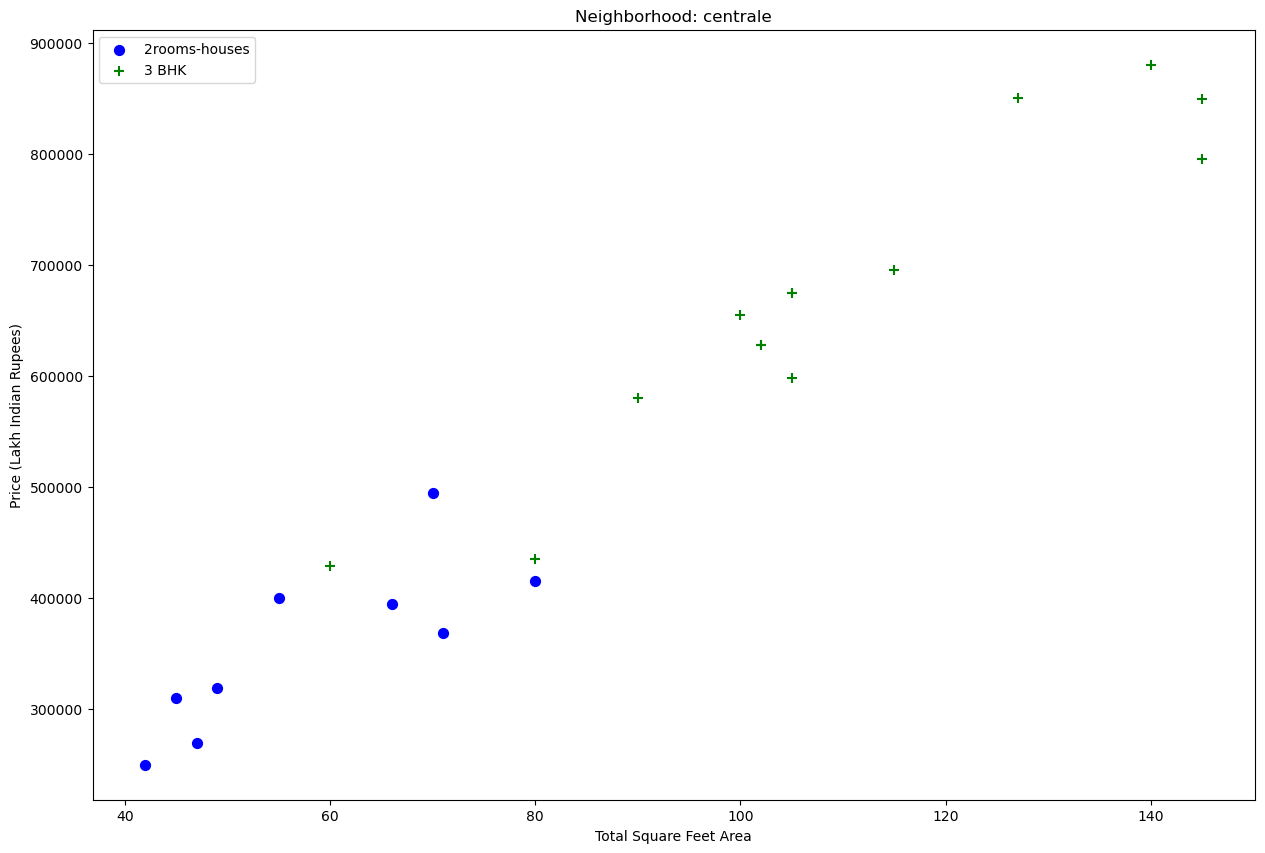

In [37]:
def plot_scatter_chart(df, neighborhood):

    two_rooms_houses = df.loc[(df['neighborhood'] == neighborhood) & (df['rooms'] == 2)]
    three_rooms_houses = df.loc[(df['neighborhood'] == neighborhood) & (df['rooms'] == 3)]

    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(two_rooms_houses.m2,two_rooms_houses.price,color='blue',label='2rooms-houses', s=50)
    plt.scatter(three_rooms_houses.m2,three_rooms_houses.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title("Neighborhood: "+neighborhood)
    plt.legend()
    
plot_scatter_chart(df11,"centrale")

We should also remove properties where given same neighborhood and same square meters area, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment. This function removes outliers where, within the same neighborhood and same area, a larger apartment (e.g., 3-bedroom) has a lower price per m² than a smaller apartment (e.g., 2-bedroom).

The following function, called remove_houses_outliers, is structured as follows:

1) An empty NumPy array is created to store the indices of rows that will be removed (the outliers).
2) The function loops through each neighborhood. For each group of properties (e.g., all 2-bedroom apartments, all 3-bedroom apartments), it calculates: "mean price per m²", "standard deviation of price per m²", "Number of properties in the group"
3) If a larger apartment has a lower price per m² than the average of smaller apartments, its index is added to exclude_indices.
4) The function returns a DataFrame with the outlier rows removed.

In [38]:
def remove_houses_outliers(df):
    excluded_indices = np.array([])
    for neighborhood, neighborhood_df in df.groupby('neighborhood'):
        rooms_stats = {}
        for rooms, rooms_df in neighborhood_df.groupby('rooms'):
            rooms_stats[rooms] = {
                'mean': np.mean(rooms_df.price_per_m2),
                'std': np.std(rooms_df.price_per_m2),
                'count': rooms_df.shape[0]
            }
        for rooms, rooms_df in neighborhood_df.groupby('rooms'):
            stats = rooms_stats.get(rooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(excluded_indices, rooms_df[rooms_df.price_per_m2<(stats['mean'])].index.values)
    return df.drop(excluded_indices,axis='index')
df12 = remove_houses_outliers(df11)
df12.shape

(1229, 6)

From the number of rows "1233", which is the same as in the previous output, we can see that no row has been deleted.

### 6.10. One-Hot Encoding for  "neighborhood" column

The "neighborhood" feature needs one final adjustment. Since "neighborhood" is a qualitative, not a quantitative variable, and linear regression models require numerical inputs, we will convert the "neighborhood" feature into dummy variables—one for each unique neighborhood in the dataset:

In [39]:
neighborhood_dummies = pd.get_dummies(df12.neighborhood).astype(int)
#neighborhood_dummies.head(10)

Let's append these dummies to the dataframe. To do this, I'll concatenate the two dataframes df12 and neighborhood_dummies:

In [40]:
df13 = pd.concat([df12,neighborhood_dummies.drop('other',axis='columns')],axis='columns') # we droped the column "other" from the dataframe called "location_dummies"
df13.head(3)

,rooms,m2,bathrooms,price,neighborhood,price_per_m2,affori,arena,argonne - corsica,baggio,...,sempione,solari,ticinese,tre castelli - faenza,turati,vercelli - wagner,viale ungheria - mecenate,vigentino - fatima,vincenzo monti,washington
0,2,75,1,219000.0,affori,2920.00000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,120,2,429000.0,affori,3575.00000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,46,1,185000.0,affori,4021.73913,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6.11. Dropping the columns "neighborhood" and "price_per_m2"

Finally we drop the columns "neighborhood" and "price_per_m2", since we don't need them anymore (we converted the "neighborhood" column into dummies and we used the feature "price_per_m2" for our previous functions):

In [41]:
df14 = df13.copy()
df14 = df14.drop(["neighborhood", "price_per_m2"],axis='columns')
df14.head(3)

,rooms,m2,bathrooms,price,affori,arena,argonne - corsica,baggio,bande nere,bovisa,...,sempione,solari,ticinese,tre castelli - faenza,turati,vercelli - wagner,viale ungheria - mecenate,vigentino - fatima,vincenzo monti,washington
0,2,75,1,219000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,120,2,429000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,46,1,185000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now the dataset is fully clean and ready to be used for the linear regression model.

## 7. Linear Regression Model

### 7.1. Building the linear regression model

In the following code I define the independent variables for the model: to do this, I create a dataframe called "X" and simply drop the only variable that should not be part of it, i.e. "price"

In [42]:
X = df14.drop(['price'],axis='columns')
X.head(3)

,rooms,m2,bathrooms,affori,arena,argonne - corsica,baggio,bande nere,bovisa,buenos aires,...,sempione,solari,ticinese,tre castelli - faenza,turati,vercelli - wagner,viale ungheria - mecenate,vigentino - fatima,vincenzo monti,washington
0,2,75,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,120,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,46,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here below I do the exact opposite: I create a dataframe y and keep my y-variable "price"

In [43]:
y = df14.price
y.head(3)

0    219000.0
1    429000.0
2    185000.0
Name: price, dtype: float64

In the following code, we first split our data into training and testing sets. We use the train_test_split function from Scikit-learn to randomly split the dataset into two subsets: one for training the model and the other for testing it. "test_size=0.2" means that 20% of the data will be used for testing, while the remaining 80% is used for training.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Next, we create and train a Linear Regression model:

In [45]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train);

Finally, we evaluate the model's performance on the testing set:

In [46]:
lr_clf.score(X_test,y_test)

0.8725202651133134

The "score(X_test, y_test)" method calculates the R² score (coefficient of determination), which measures how well the model explains the variance in the test data. In this case, the model's R² score is 0.85.
An R² score of 0.85 means that 85% of the variance in the target variable can be explained by the model, which indicates a relatively good fit.

### 7.2. Use of K Fold cross validation to measure accuracy of our LinearRegression model

To evaluate the performance and robustness of our Linear Regression model, we employ K-Fold cross-validation. Cross-validation helps in assessing the model's ability to generalize to unseen data by splitting the dataset into multiple training and testing sets, providing a more reliable estimate of model performance compared to a simple train-test split.

In this case, we use ShuffleSplit with 5 splits, which means the data is randomly divided into 5 different training and testing sets. Each set is used as the test set once, while the other 80% serves as the training set. This technique ensures that the model is tested on different subsets of the data, reducing the likelihood of overfitting.

The cross_val_score function returns the R² score for each fold, providing an estimate of how well the model performs across different subsets of the data.

In [47]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87252027, 0.88089023, 0.8045052 , 0.86338382, 0.86931679])

We can see that the model's performance is consistent, with scores ranging between 0.84 and 0.85, indicating that the model is good.

### 7.3. Testing the model for few properties

In the final chapter of this project, we test the prediction model by inserting values of our choice for the following features:

- Neighborhood
- Number of rooms
- Apartment size
- Number of bathrooms
  
To do this, I created a function called predict_price. This function encapsulates the linear regression model, allowing the function to return the estimated price based on the input values for these features:

In [48]:
def predict_price(neighborhood, m2, bathrooms, rooms):
    # Create an array of zeros with the length of all the features
    x = np.zeros(X.shape[1])
    
    # Fill in the values for the numeric features
    x[X.columns.get_loc('m2')] = m2
    x[X.columns.get_loc('bathrooms')] = bathrooms
    x[X.columns.get_loc('rooms')] = rooms
    
    # Find neighborhood column index and set to 1
    if neighborhood in X.columns:
        loc_index = X.columns.get_loc(neighborhood)
        x[loc_index] = 1
    else:
        raise ValueError(f"The neighborhood '{neighborhood}' does not exist in the DataFrame columns.")

    
    #Convert x to DataFrame with column names
    x_df = pd.DataFrame([x], columns=X.columns)

    return round(lr_clf.predict(x_df)[0], 2)

Now let's use the function by inserting values of our choice. Here is a list of the neighborhoods of Milano:

In [49]:
df13.neighborhood.unique()

array(['affori', 'arena', 'argonne - corsica', 'baggio', 'bande nere',
       'bovisa', 'buenos aires', 'cadore', 'carrobbio',
       'cascina dei pomi', 'cascina merlata - musocco', 'cenisio',
       'centrale', 'certosa', 'cimiano', 'città studi', 'corso genova',
       'corso san gottardo', 'corvetto', 'crescenzago', 'dergano',
       'duomo', 'farini', 'gallaratese', 'gambara',
       'ghisolfa - mac mahon', 'giambellino', 'gorla', 'greco - segnano',
       'indipendenza', 'isola', 'lodi - brenta', 'lorenteggio',
       'maggiolina', 'martini - insubria', 'monte rosa - lotto',
       'morgagni', 'moscova', 'navigli - darsena', 'niguarda', 'other',
       'pagano', 'paolo sarpi', 'pasteur', 'pezzotti - meda',
       'piave - tricolore', 'piazzale siena', 'plebisciti - susa',
       'ponte nuovo', "porta romana - medaglie d'oro", 'porta venezia',
       'porta vittoria', 'precotto', 'primaticcio',
       'quadronno - crocetta', 'quartiere adriano', 'ripamonti',
       'san siro', 'sa

Let's extract the estimated price for a 4-rooms apartment equipped with three bathrooms in a not central area, e.g. "Quartiere Adriano":

In [50]:
predict_price('quartiere adriano', 140, 4, 3)

565778.64

Now let's find out the price for a property with identical features but in a very central area, e.g. "Moscova":

In [51]:
predict_price('moscova', 140, 4, 3)

1365526.83

## 8. Conclusion

This project began with a typical data science scenario in the real estate industry: a real estate agency aiming to implement a housing price prediction model to gain a competitive edge in its day-to-day operations.

Through this project, we highlighted the crucial importance of the data cleaning process. Without proper data cleaning, the model would produce inaccurate results. Specifically, techniques like feature engineering and outlier removal are essential steps in ensuring clean data, alongside standard practices such as dropping irrelevant columns and dealing with NaN values.

The linear regression model proved to be an effective prediction tool for this case study, as the relationship between housing prices and their features is often linear. This was further confirmed by the high R² score achieved during model evaluation.